# LOAD THE LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# LOAD THE DATASET

In [4]:
df=pd.read_csv(r'C:\Users\vamsh\Downloads\odi.csv')

In [5]:
df.head()

mid        date                                 venue bat_team bowl_team  \
0    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
1    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
2    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
3    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   
4    1  2006-06-13  Civil Service Cricket Club, Stormont  England   Ireland   

          batsman       bowler  runs  wickets  overs  runs_last_5  \
0  ME Trescothick  DT Johnston     0        0    0.1            0   
1  ME Trescothick  DT Johnston     0        0    0.2            0   
2  ME Trescothick  DT Johnston     4        0    0.3            4   
3  ME Trescothick  DT Johnston     6        0    0.4            6   
4  ME Trescothick  DT Johnston     6        0    0.5            6   

   wickets_last_5  striker  non-striker  total  
0               0        0            0    301  
1               0        0            0    301  
2               0        0            0    301  
3               0        0            0    301  
4               0        0            0    301

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             350899 non-null  int64  
 1   date            350899 non-null  object 
 2   venue           350899 non-null  object 
 3   bat_team        350899 non-null  object 
 4   bowl_team       350899 non-null  object 
 5   batsman         350899 non-null  object 
 6   bowler          350899 non-null  object 
 7   runs            350899 non-null  int64  
 8   wickets         350899 non-null  int64  
 9   overs           350899 non-null  float64
 10  runs_last_5     350899 non-null  int64  
 11  wickets_last_5  350899 non-null  int64  
 12  striker         350899 non-null  int64  
 13  non-striker     350899 non-null  int64  
 14  total           350899 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 40.2+ MB


# CHECK FOR NULL VALUES

In [7]:
df.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

**There aren't any null values in the dataset.**

In [8]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [9]:
df.shape

(350899, 15)

In [10]:
df.corr().style.background_gradient(cmap = 'Accent_r')

<Figure size 600x400 with 0 Axes>

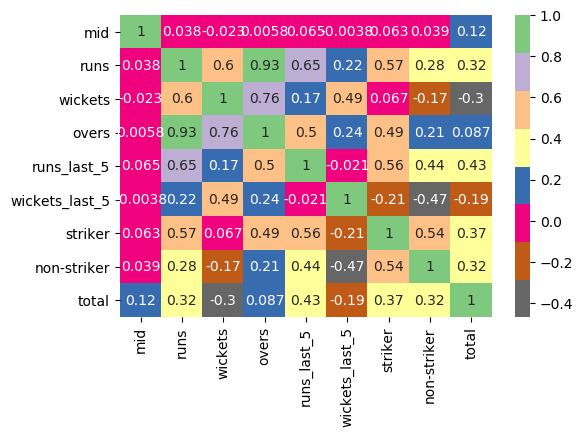

In [11]:
plt.figure(dpi = 100)
sns.heatmap(df.corr(), cmap='Accent_r', annot=True)

## PAIRPLOT 

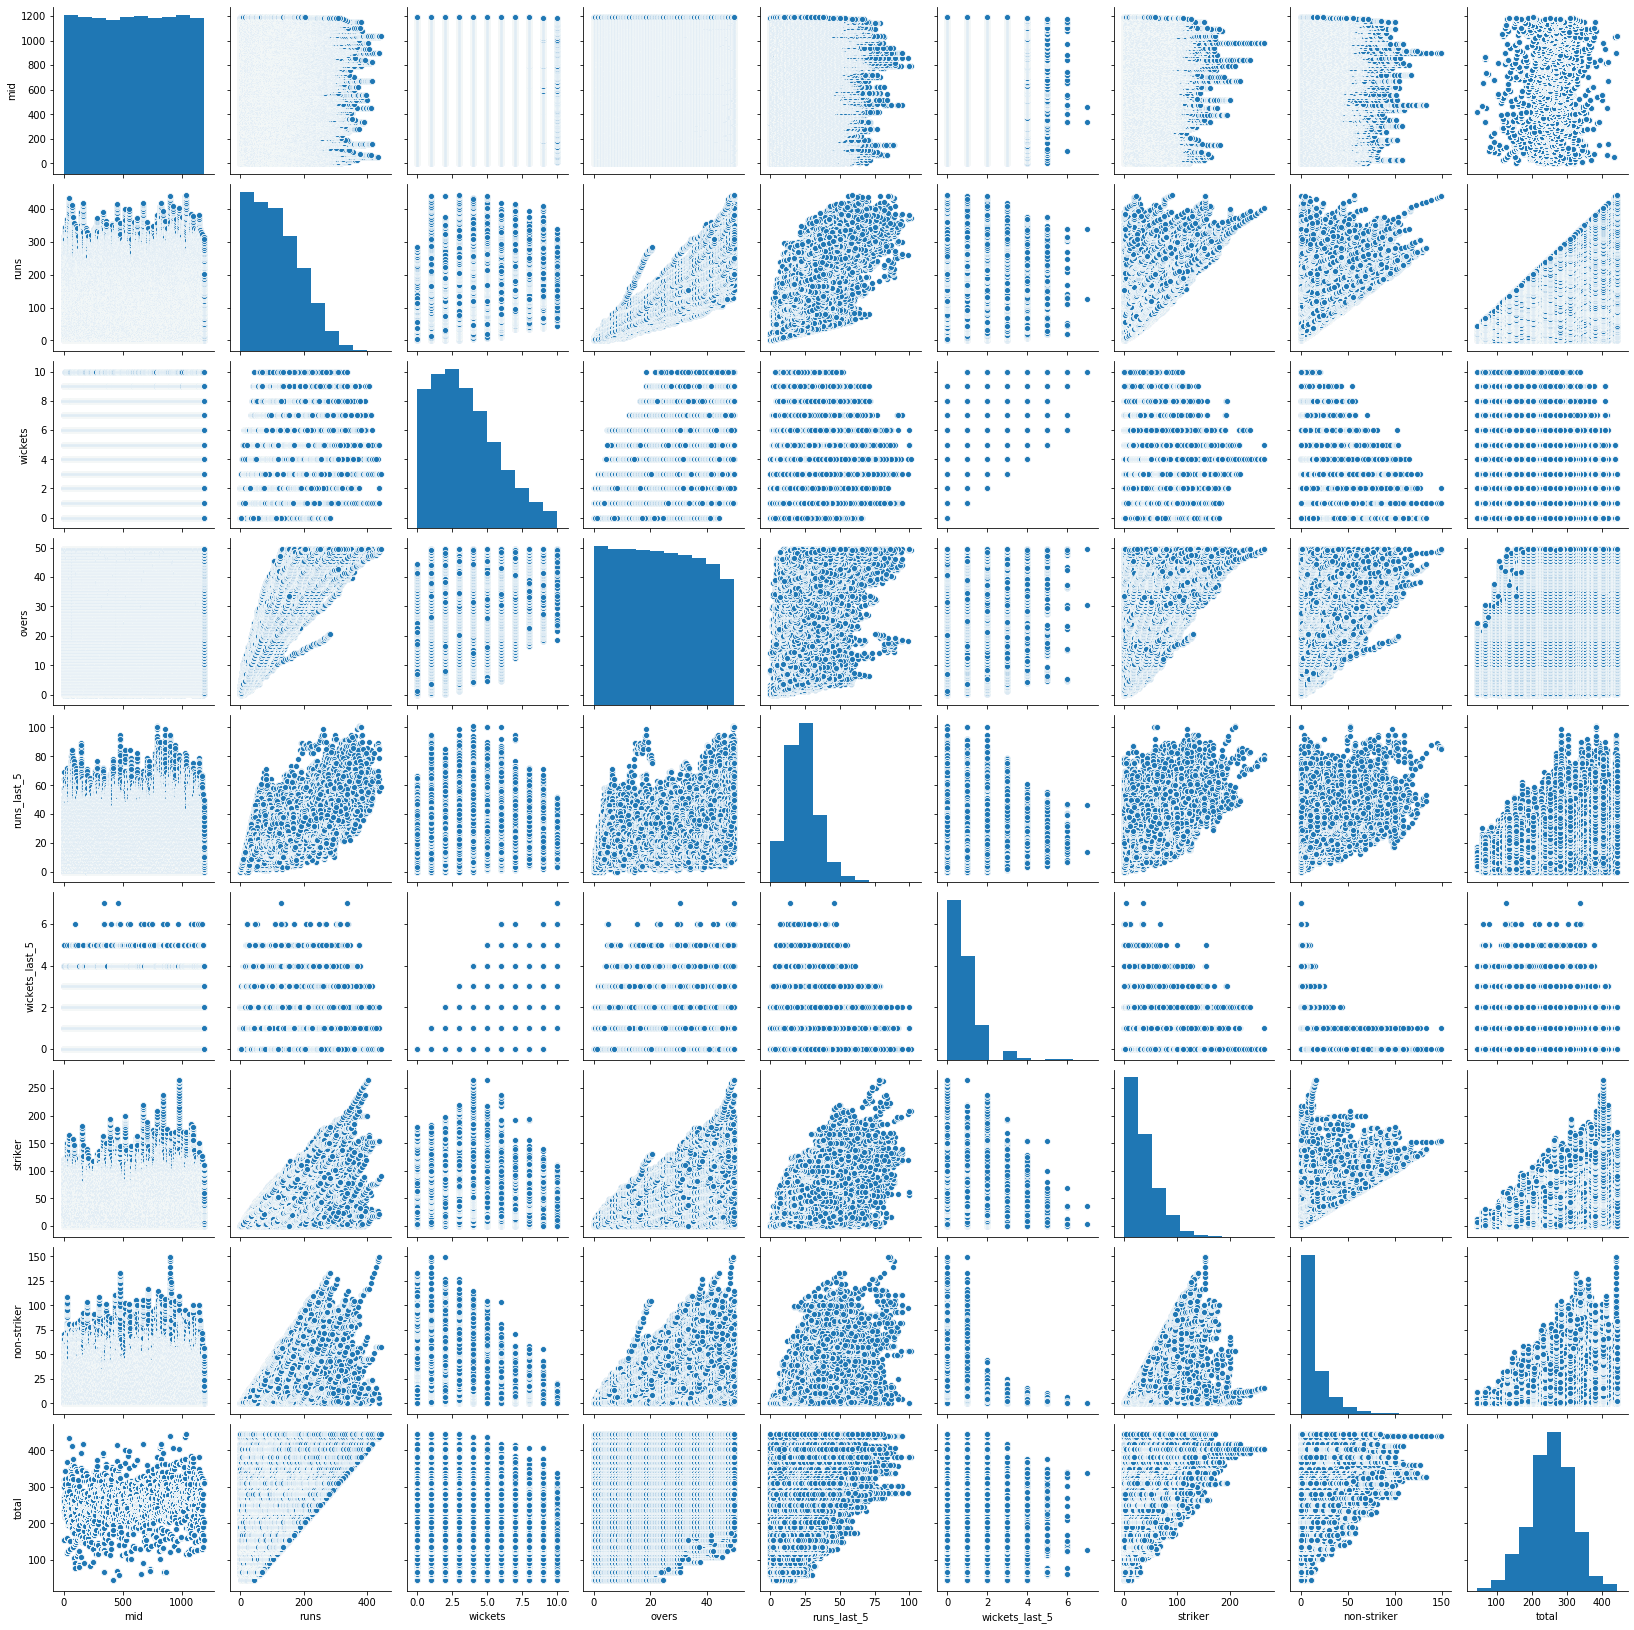

In [12]:
sns.pairplot(df)

## HEATMAP

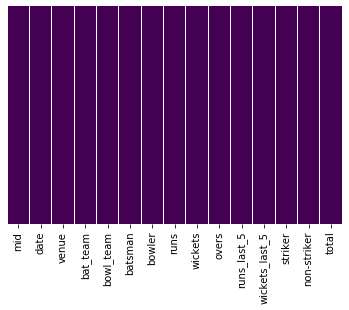

In [13]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

**This is a graphical representation of the fact that there are no null values in the dataset.**

# GROUPBY OPERATION

## To find average number of runs scored by each country

In [14]:
grouped=df.groupby('bat_team')

In [15]:
grouped.mean().runs

bat_team
Afghanistan             103.719725
Asia XI                 150.514989
Australia               122.956547
Bangladesh              105.383375
Bermuda                  86.493213
Canada                   94.619701
England                 120.585727
Hong Kong               100.560976
India                   125.675789
Ireland                 103.182362
Kenya                    84.564852
Netherlands              92.863177
New Zealand             118.863359
Pakistan                114.268115
Papua New Guinea        110.830986
Scotland                102.031166
South Africa            124.920405
Sri Lanka               116.667119
United Arab Emirates    103.675474
West Indies             103.824277
Zimbabwe                 93.753860
Name: runs, dtype: float64

## BAR-GRAPH 

Text(0, 0.5, 'Average number of runs scored by each country')

Text(0.5, 0, 'Batting team')

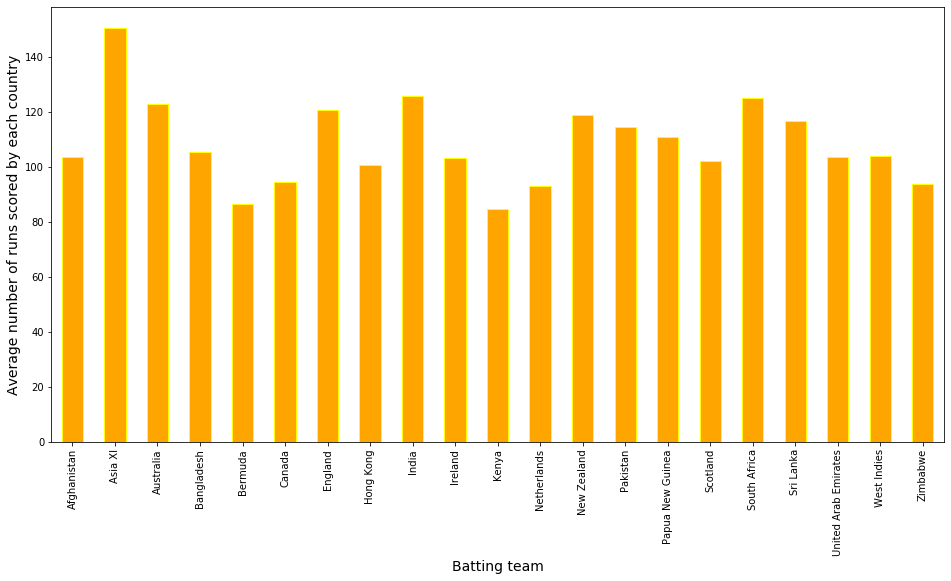

In [16]:
grouped.mean().runs.plot(kind='bar', figsize=[16,8], edgecolor='yellow', color='orange')
plt.ylabel('Average number of runs scored by each country', fontsize=14)
plt.xlabel("Batting team",fontsize=14)

## REMOVING COLUMNS WHICH DO NOT CONTRIBUTE TO TOTAL SCORE

In [17]:
df=df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total']]

In [18]:
df

venue   bat_team  \
0                    Civil Service Cricket Club, Stormont    England   
1                    Civil Service Cricket Club, Stormont    England   
2                    Civil Service Cricket Club, Stormont    England   
3                    Civil Service Cricket Club, Stormont    England   
4                    Civil Service Cricket Club, Stormont    England   
...                                                   ...        ...   
350894  Mahinda Rajapaksa International Cricket Stadiu...  Sri Lanka   
350895  Mahinda Rajapaksa International Cricket Stadiu...  Sri Lanka   
350896  Mahinda Rajapaksa International Cricket Stadiu...  Sri Lanka   
350897  Mahinda Rajapaksa International Cricket Stadiu...  Sri Lanka   
350898  Mahinda Rajapaksa International Cricket Stadiu...  Sri Lanka   

       bowl_team         batsman       bowler  runs  wickets  overs  \
0        Ireland  ME Trescothick  DT Johnston     0        0    0.1   
1        Ireland  ME Trescothick  DT Johnston     0        0    0.2   
2        Ireland  ME Trescothick  DT Johnston     4        0    0.3   
3        Ireland  ME Trescothick  DT Johnston     6        0    0.4   
4        Ireland  ME Trescothick  DT Johnston     6        0    0.5   
...          ...             ...          ...   ...      ...    ...   
350894  Zimbabwe   DAS Gunaratne   TL Chatara   201        8   49.2   
350895  Zimbabwe   DAS Gunaratne   TL Chatara   201        8   49.3   
350896  Zimbabwe   DAS Gunaratne   TL Chatara   201        8   49.4   
350897  Zimbabwe   DAS Gunaratne   TL Chatara   202        8   49.5   
350898  Zimbabwe    PVD Chameera   TL Chatara   203        8   49.6   

        runs_last_5  wickets_last_5  striker  non-striker  total  
0                 0               0        0            0    301  
1                 0               0        0            0    301  
2                 4               0        0            0    301  
3                 6               0        0            0    301  
4                 6               0        0            0    301  
...             ...             ...      ...          ...    ...  
350894           39               0       59           18    203  
350895           39               0       59           18    203  
350896           38               0       59           18    203  
350897           38               0       59           18    203  
350898           38               0       59           18    203  

[350899 rows x 13 columns]

# LABEL ENCODING

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
for i in ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']:
    df[i]=le.fit_transform(df[i])

In [21]:
df.head()

venue  bat_team  bowl_team  batsman  bowler  runs  wickets  overs  \
0     19         6          9      520     168     0        0    0.1   
1     19         6          9      520     168     0        0    0.2   
2     19         6          9      520     168     4        0    0.3   
3     19         6          9      520     168     6        0    0.4   
4     19         6          9      520     168     6        0    0.5   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            0               0        0            0    301  
1            0               0        0            0    301  
2            4               0        0            0    301  
3            6               0        0            0    301  
4            6               0        0            0    301

## PICKING TOTAL COLUMN AS TARGET VARIABLE

In [22]:
Y=df['total']

## SELECTING RELEVANT FEATURES 

In [23]:
X=df[['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker']]

## PERFORMING TRAIN-TEST SPLIT 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

## PERFORMING FEATURE SCALING 

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# LINEAR REGRESSION 

In [28]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [29]:
linreg = LinearRegression() 

In [30]:
linreg.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
linreg.score(X_test, Y_test)

0.5301267381136016

# DECISION TREE REGRESSION

In [32]:
from sklearn.tree import DecisionTreeRegressor  
  
regressor = DecisionTreeRegressor()  
  
regressor.fit(X_train, Y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
y_pred=regressor.predict(X_test)

In [34]:
r2_score(y_pred,Y_test)

0.9332767752078911

# RANDOM FOREST REGRESSION

In [35]:
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
rf.fit(X_train, Y_train)  

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred=rf.predict(X_test)

In [37]:
r2_score(Y_test,y_pred)

0.9760768990139562

# CONCLUSION:

**Random Forest Regression gives the highest score compared to other regression models(algorithms) for the given dataset.**